# H-He Mixture

In this notebook we will calculate the diffusion and interdiffusion coefficients of Binary Ionic Mixture (BIM) of Hydrogen and Helium. This notebook tries to reproduce the data obtained from Hansen, Joly, and McDonald's [paper](https://doi.org/10.1016/0378-4371(85)90022-6).

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/BIM/inpu_files/BIM_cgs.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/BIM/H-He_Mixture.ipynb).

In [2]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess


# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'BIM_cgs.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Simulation

In [6]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()










 _______  _______  _______  _        _______  _______ 
(  ____ \(  ___  )(  ____ )| \    /\(  ___  )(  ____ \
| (    \/| (   ) || (    )||  \  / /| (   ) || (    \/
| (_____ | (___) || (____)||  (_/ / | (___) || (_____ 
(_____  )|  ___  ||     __)|   _ (  |  ___  |(_____  )
      ) || (   ) || (\ (   |  ( \ \ | (   ) |      ) |
/\____) || )   ( || ) \ \__|  /  \ \| )   ( |/\____) |
\_______)|/     \||/   \__/|_/    \/|/     \|\_______)
                                                      


An open-source pure-python molecular dynamics suite for non-ideal plasmas.



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                   Simulation                                   
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  bim
Job directory:  Simulations/bim

Equilibration dumps directory: 
 Simulations/bim/Simulation/Equilibration/dumps
Producti

  0%|          | 0/10000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 26 min 15 sec

------------- Production -------------


  0%|          | 0/100000 [00:00<?, ?it/s]


Production Time: 4 hrs 45 min 49 sec

Total Time: 5 hrs 12 min 5 sec


# PostProcessing


In [3]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Postprocessing                                 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  bim
Job directory:  Simulations/bim
PostProcessing directory: 
 Simulations/bim/PostProcessing

Equilibration dumps directory:  Simulations/bim/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/bim/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/bim/Simulation/Equilibration/EquilibrationEnergy_bim.csv
Production Thermodynamics file: 
 Simulations/bim/Simulation/Production/ProductionEnergy_bim.csv


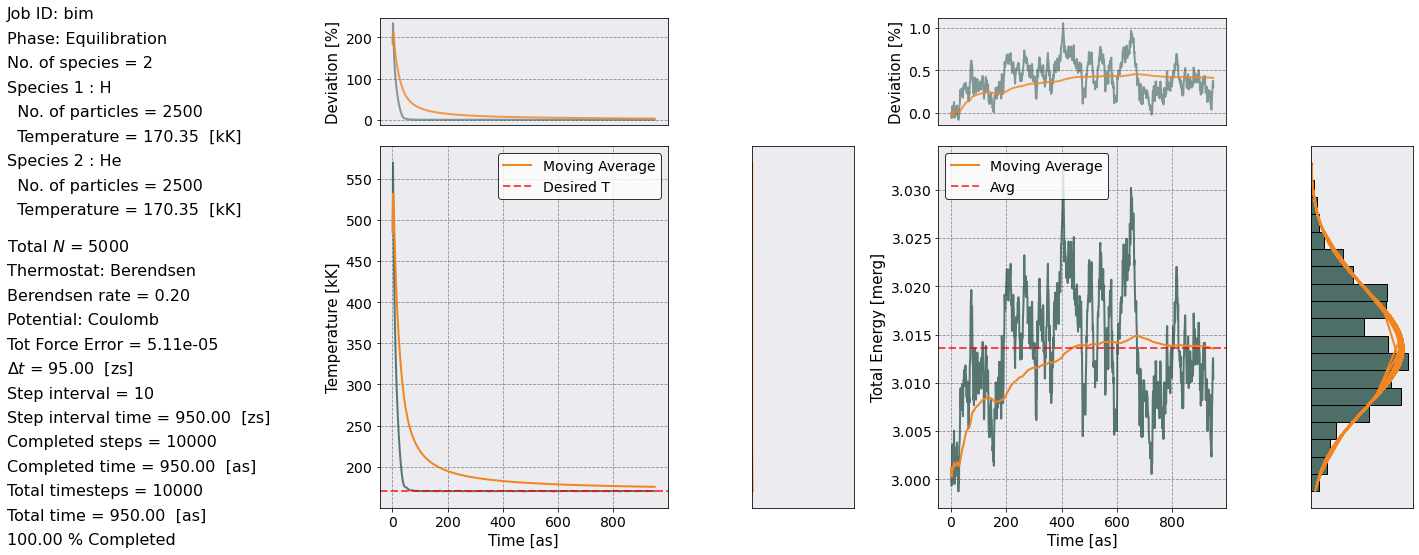

In [8]:
# Equilibration check
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc, phase='equilibration')


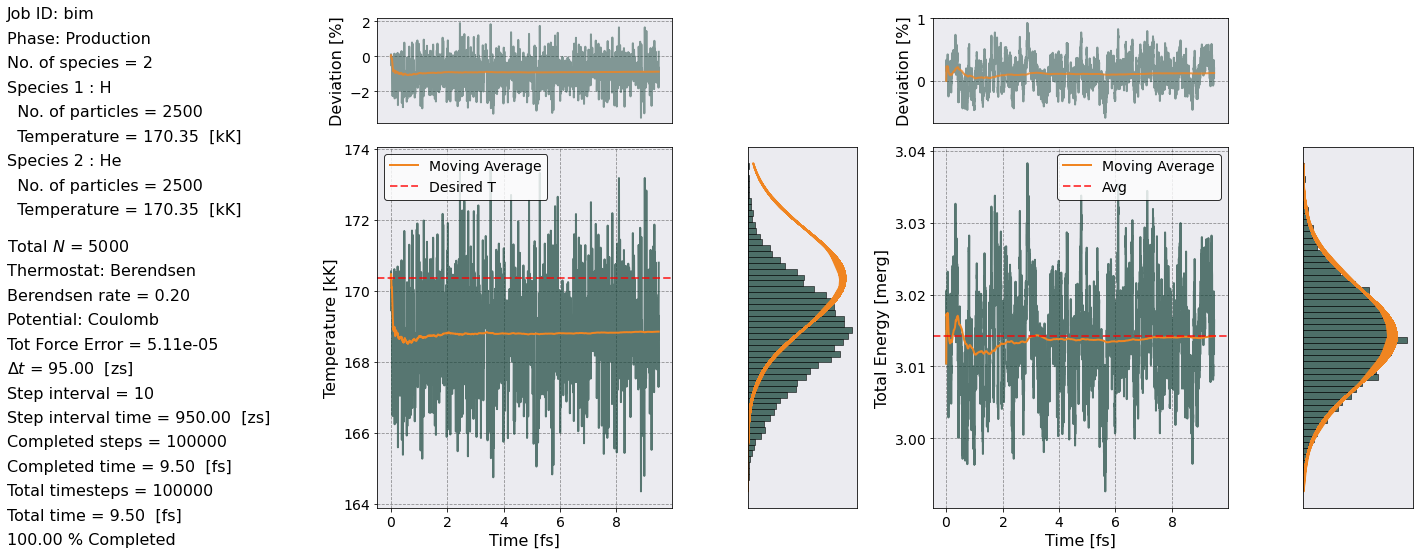

In [9]:
# Production check
postproc.therm.temp_energy_plot(postproc, phase='production')


Radial Distribution Function Calculation Time: 0 sec 1 msec 578 usec 255 nsec


<AxesSubplot:xlabel='$r / a_{\\rm ws}$'>

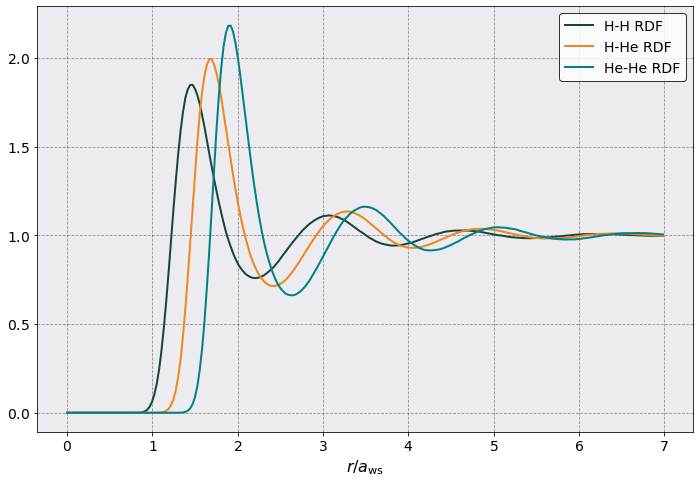

In [10]:
postproc.rdf.setup(postproc.parameters)
postproc.rdf.compute()
postproc.rdf.plot(scaling = postproc.parameters.a_ws, 
                  xlabel = r'$r / a_{\rm ws}$')

In [11]:
from sarkas.tools.observables import StaticStructureFactor

ssf = StaticStructureFactor()
ssf.no_slices = 4
ssf.angle_averaging = 'full'
ssf.max_ka_value = 5
ssf.setup(postproc.parameters)
ssf.pretty_print()




===================== Static Structure Function ====================== 

k wavevector information saved in: 
 Simulations/bim/PostProcessing/k_space_data/k_arrays.npz
n(k,t) Data saved in: 
 Simulations/bim/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/bim/PostProcessing/StaticStructureFunction/Production/StaticStructureFunction_bim.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.dataframe

Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.2279 / a_ws = 9.2974e+08 [1/cm]

Angle averaging choice: full
	Maximum angle averaged k harmonics = n_x, n_y, n_z = 12, 12, 12
	Largest angle averaged k_max = k_min * sqrt( n_x^2 + n_y^2 + n_z^2)
	k_max = 4.7377 / a_ws = 1.9324e+10 [1/cm]

Total number of k values to calculate = 2196
No. of unique ka values to calculate = 354


In [12]:
ssf.compute()
ssf.dataframe


Calculating n(k,t) for slice 1/4.


  0%|          | 0/2500 [00:00<?, ?it/s]


Calculating n(k,t) for slice 2/4.


  0%|          | 0/2500 [00:00<?, ?it/s]


Calculating n(k,t) for slice 3/4.


  0%|          | 0/2500 [00:00<?, ?it/s]


Calculating n(k,t) for slice 4/4.


  0%|          | 0/2500 [00:00<?, ?it/s]


n(k,t) Calculation Time: 1 hrs 12 min 16 sec

Calculating S(k) ...


  0%|          | 0/4 [00:00<?, ?it/s]


Static Structure Function Calculation Time: 1 sec 149 msec 725 usec 76 nsec


Inverse Wavelength       H-H                H-He               He-He  \
                   NaN      Mean       Std      Mean       Std      Mean   
0         9.297400e+08  0.756288  0.146841 -0.378918  0.073543  0.190049   
1         1.314851e+09  1.179794  0.404432 -0.592622  0.203233  0.298148   
2         1.610357e+09  1.264727  0.968884 -0.636712  0.487861  0.321134   
3         1.859480e+09  0.656470  0.338960 -0.331031  0.171030  0.167827   
4         2.078962e+09  0.893011  0.363256 -0.451449  0.183842  0.229346   
..                 ...       ...       ...       ...       ...       ...   
349       1.785972e+10  1.268168  0.692608  0.505845  0.549410  1.338055   
350       1.826649e+10  1.171554  0.624012  0.372167  0.536261  1.220345   
351       1.831376e+10  1.222219  0.697804  0.412061  0.508447  1.135492   
352       1.880283e+10  1.177969  0.656677  0.379581  0.478443  1.044912   
353       1.932428e+10  1.356555  1.378294  0.236343  0.859552  1.060017   

               
          Std  
0    0.037005  
1    0.102340  
2    0.245976  
3    0.086515  
4    0.093274  
..        ...  
349  0.719504  
350  0.694275  
351  0.676501  
352  0.628631  
353  1.049765  

[354 rows x 7 columns]

<AxesSubplot:xlabel='$ka$'>

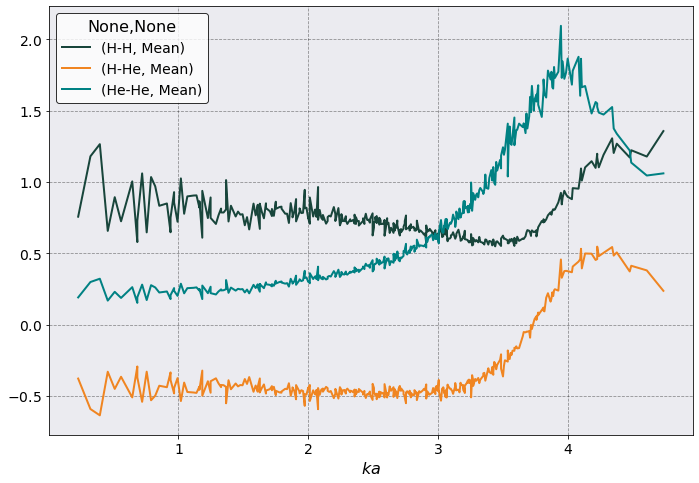

In [13]:
ssf.plot(
    scaling = 1 /ssf.a_ws,
    y= [('H-H', 'Mean'), ('H-He', 'Mean'), ('He-He', 'Mean')], 
    xlabel = r'$ka$')

In [ ]:
from scipy.optimize import curve_fit

def poly_fit(x, a, b, c):
    return a*x**2 + b*x + c

def lin_fit(x, a, b):
    return a*x + b

def inv_fit(x, a, b, c):
    return a*np.exp(b*x) + c

In [ ]:
poptH, pcov = curve_fit(poly_fit, sk_array[:,0][k_counts>3][:100], sk_array[:,1][k_counts>3][:100])
poptHHe, pcov = curve_fit(lin_fit, sk_array[:,0][k_counts>3][:30], sk_array[:,3][k_counts>3][:30])
poptHe, pcov = curve_fit(inv_fit, sk_array[:,0][k_counts>3][:120], sk_array[:,5][k_counts>3][:120])

k_pred = np.arange(0,3.5, 0.1)
plt.plot(k_pred, poly_fit(k_pred, *poptH), color='cornflowerblue', ls='--', lw=2)

k_pred = np.arange(0,sk_array[:,0][k_counts>3][120], 0.1)
plt.plot(k_pred, inv_fit(k_pred, *poptHe), color='indianred', ls='--', lw=2)

k_pred = np.arange(0,3, 0.1)
plt.plot(k_pred, lin_fit(k_pred, *poptHHe), color='tab:purple', ls='--', lw=2)
# plt.axvline(0, color='black', ls='--', lw=2)

Scc = x1*x2*(x2*inv_fit(0, *poptHe) + x1*poly_fit(0, *poptH) - 2*np.sqrt(x1*x2)*lin_fit(0, *poptHHe))



## Interdiffusion

Calculating transport coefficients is easy once the ``TransportCoefficient`` class from the ``sarkas.tools.transport`` subpackage is imported. 

Interdiffusion is a static method of ``TransportCoefficient``. The inputs are 

        Parameters
        ----------
        params : sarkas.base.Parameters
            Simulation's parameters.
        
        phase : str, optional
            Phase to compute. Default = 'production'.
        
        no_slices : int, optional
            Number of slices of the simulation. Default = 1.
        
        time_averaging: bool, optional
            Flag for species diffusion flux time averaging. Default = False.

        timesteps_to_skip: int, optional
            Timestep interval for species diffusion flux time averaging. Default = 100

        plot : bool, optional
            Flag to plot transport coefficient with corresponding autocorrelation function. Default = True.

        figname : str, optional
            Name with which to save the file. It automatically saves it in the correct directory.
        
        show : bool, optional
            Flag for prompting plot to screen when using IPython kernel. Default = False.

        **kwargs:
            Arguments to pass :meth:`sarkas.tools.observables.FluxAutoCorrelationFunction`

The method returns a `pandas.DataFrame`

        Returns
        -------
        coefficient : pandas.DataFrame
            Pandas dataframe containing the value of the transport coefficient as a function of integration
            time.

The parameter ``params`` is required as it contains all the relevant information of the simulation. This will be passed to the appropriate observable for the calculation of its autocorrelation function. All the other parameters are optional. 

Notice the parameter ``no_slices``. This represents the number of divisions in which we want to divide the full length of the time series. For each of these ``slices`` the method will compute the ACF and then integrate it to get the transport coefficient. The transport coefficient of each slice will be stored as a column of a `pandas.DataFrame` called ``coefficient``. The first column of ``coefficient`` corresponds to the time in sec of each timestep of the slice. Once the calculation has been completed for all the slices, Sarkas will calculate the average and standard deviation over the number of slices and append them as columns to ``coefficient``. 

The option ``plot=True`` will make a figure with two plots. On the left the ACF as a function of time and on the right a plot of the transport coefficient as a function of time with the corresponding errorband.

In [4]:
from sarkas.tools.transport import TransportCoefficient
from sarkas.tools.observables import VelocityAutoCorrelationFunction, DiffusionFlux


In [5]:
# Compute the diffusion flux by dividing the simulations into 10 smaller simulations
jc_acf = DiffusionFlux()
jc_acf.no_slices = 4
jc_acf.setup(postproc.parameters)
jc_acf.compute()


Calculating diffusion flux and its acf for slice 1/4.


Read in data:   0%|          | 0/2500 [00:00<?, ?it/s]


Calculating diffusion flux and its acf for slice 2/4.


Read in data:   0%|          | 0/2500 [00:00<?, ?it/s]


Calculating diffusion flux and its acf for slice 3/4.


Read in data:   0%|          | 0/2500 [00:00<?, ?it/s]


Calculating diffusion flux and its acf for slice 4/4.


Read in data:   0%|          | 0/2500 [00:00<?, ?it/s]


Diffusion Flux and its ACF Calculation Time: 0 hrs 0 min 32 sec


In [6]:
# Let's look at it 
jc_acf.dataframe

Time Diffusion Flux 0                              \
               NaN                X             Y             Z   
               NaN          slice 0       slice 0       slice 0   
0     0.000000e+00    -2.617021e-31 -3.389665e-31 -4.087537e-31   
1     9.500000e-19    -2.252490e-17  3.990923e-18 -2.482759e-17   
2     1.900000e-18    -4.095168e-17  2.409808e-18 -4.693011e-17   
3     2.850000e-18    -5.480000e-17 -4.718272e-18 -6.555821e-17   
4     3.800000e-18    -6.376895e-17 -1.724043e-17 -8.014896e-17   
...            ...              ...           ...           ...   
2495  2.370250e-15     1.805208e-16  3.933487e-16  4.210690e-17   
2496  2.371200e-15     2.041386e-16  4.347025e-16  5.996748e-17   
2497  2.372150e-15     2.276731e-16  4.687798e-16  7.814559e-17   
2498  2.373100e-15     2.503217e-16  4.947801e-16  9.547076e-17   
2499  2.374050e-15     2.713145e-16  5.121344e-16  1.108207e-16   

     Diffusion Flux ACF 0                                            \
                        X             Y             Z         Total   
                  slice 0       slice 0       slice 0       slice 0   
0            9.480003e+15  1.091663e+16  1.126155e+16  3.165819e+16   
1            9.439336e+15  1.085671e+16  1.121291e+16  3.150896e+16   
2            9.314934e+15  1.068448e+16  1.105979e+16  3.105921e+16   
3            9.109107e+15  1.040364e+16  1.080537e+16  3.031812e+16   
4            8.825656e+15  1.002016e+16  1.045489e+16  2.930070e+16   
...                   ...           ...           ...           ...   
2495        -1.254977e+15 -2.317612e+14 -5.668033e+14 -2.053542e+15   
2496        -1.055828e+15  2.257743e+13 -4.777222e+14 -1.510973e+15   
2497        -7.795405e+14  1.493422e+14 -3.523742e+14 -9.825726e+14   
2498        -4.266486e+14  1.426894e+14 -1.920833e+14 -4.760426e+14   
2499         4.194304e+02  4.194304e+02  0.000000e+00  8.388608e+02   

     Diffusion Flux 0                ...                              \
                    X             Y  ...             Z                 
              slice 1       slice 1  ...          Mean           Std   
0        2.899646e-16  5.205217e-16  ... -1.064998e-17  1.199352e-16   
1        3.057031e-16  5.198731e-16  ... -2.597117e-17  1.512878e-16   
2        3.180984e-16  5.103667e-16  ... -4.204757e-17  1.828815e-16   
3        3.268628e-16  4.924153e-16  ... -5.857656e-17  2.134336e-16   
4        3.318516e-16  4.666505e-16  ... -7.524226e-17  2.421415e-16   
...               ...           ...  ...           ...           ...   
2495     5.288348e-16 -7.942051e-19  ... -6.901454e-17  1.917387e-16   
2496     5.449652e-16  1.840125e-17  ... -7.113654e-17  1.825976e-16   
2497     5.551124e-16  3.889167e-17  ... -7.399409e-17  1.770642e-16   
2498     5.588525e-16  6.048540e-17  ... -7.768354e-17  1.761676e-16   
2499     5.559164e-16  8.289003e-17  ... -8.225188e-17  1.804049e-16   

     Diffusion Flux ACF 0                                            \
                        X                           Y                 
                     Mean           Std          Mean           Std   
0            1.008575e+16  1.182383e+15  1.057538e+16  9.345124e+14   
1            1.002116e+16  1.180069e+15  1.051472e+16  9.367472e+14   
2            9.858791e+15  1.168049e+15  1.033517e+16  9.380891e+14   
3            9.602046e+15  1.146958e+15  1.004053e+16  9.385421e+14   
4            9.256245e+15  1.117795e+15  9.636998e+15  9.381702e+14   
...                   ...           ...           ...           ...   
2495         6.385223e+15  4.922130e+16  4.885044e+14  3.338640e+15   
2496         6.539456e+15  5.160549e+16  5.479167e+14  3.706325e+15   
2497         6.676589e+15  5.357532e+16  5.868826e+14  4.111477e+15   
2498         6.790852e+15  5.510190e+16  6.045446e+14  4.531873e+15   
2499         6.876435e+15  5.616471e+16  6.000714e+14  4.952237e+15   

                                                              
             

Notice that there is a column `Diffusion Flux 0` and `Diffusion Flux ACF 0` for each slice. For the transport coefficient I will use `Diffusion Flux ACF 0`.



===================== Interdiffusion Coefficient ===================== 

Data saved in: 
 Simulations/bim/PostProcessing/DiffusionFlux/Production/InterDiffusion_bim.h5

No. of slices = 4
No. dumps per slice = 250
Time interval of autocorrelation function = 2.3750e-15 [s] ~ 397 w_p T


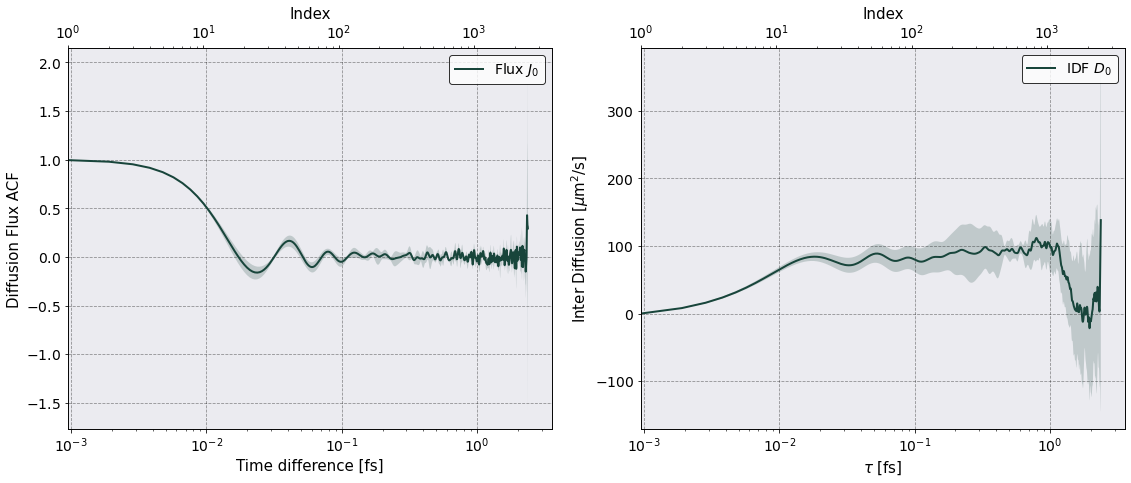

In [7]:
aws = postproc.parameters.a_ws
vaa = postproc.parameters.hydrodynamic_frequency
norm = 1/(vaa * aws**2 )

interdiffusion = TransportCoefficient.interdiffusion(
        postproc.parameters, 
        compute_acf = False, # This option is to avoid recalculating the ACF in case you already have it. 
        # If False reads it in, but the no_slices should be the same otherwise you get an error.
        no_slices = 4,
        plot = True,
        verbose = False)

# Note the info printed to screen

In [8]:
# Let's look at what we have
interdiffusion

Time Inter Diffusion Flux 0                                \
               NaN                slice 0   slice 1   slice 2   slice 3   
0     0.000000e+00               0.000000  0.000000  0.000000  0.000000   
1     9.500000e-19               0.000000  0.000000  0.000000  0.000000   
2     1.900000e-18               0.000008  0.000008  0.000007  0.000009   
3     2.850000e-18               0.000016  0.000016  0.000015  0.000017   
4     3.800000e-18               0.000024  0.000024  0.000022  0.000025   
...            ...                    ...       ...       ...       ...   
2495  2.370250e-15              -0.000166  0.000148  0.000121  0.000411   
2496  2.371200e-15              -0.000167  0.000154  0.000137  0.000400   
2497  2.372150e-15              -0.000167  0.000161  0.000153  0.000387   
2498  2.373100e-15              -0.000167  0.000168  0.000170  0.000373   
2499  2.374050e-15              -0.000167  0.000175  0.000188  0.000358   

                              
          Mean           Std  
0     0.000000  0.000000e+00  
1     0.000000  0.000000e+00  
2     0.000008  4.593336e-07  
3     0.000016  9.136401e-07  
4     0.000024  1.358047e-06  
...        ...           ...  
2495  0.000128  2.359837e-04  
2496  0.000131  2.319035e-04  
2497  0.000133  2.278184e-04  
2498  0.000136  2.239089e-04  
2499  0.000138  2.203576e-04  

[2500 rows x 7 columns]

As mentioned the InterDiffusion is calculated for each slice and then averaged. The left plot above shows the mean of 4 slices of the Diffusion Flux ACF with its standard deviation as the shaded area.

NameError: name 'sk_array' is not defined